In [1]:
'''This notebook implements the Random Forest classifier on
    1. The linear dataset
    2. The standardized linear dataset
    3. The standardized expanded dataset
    4. Optimal features selected from the expanded dataset'''

__author__ = 'Anjana Niranjan'
__email__ = 'anjanani@usc.edu'

**Random Forest**
Thanks to the sklearn website for examples on the functions used in this code.
Thanks to https://stackoverflow.com/questions/51194627/python-naive-bayes-with-cross-validation-using-gaussiannb-classifier for helping with cross-validation.

In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Loading the train and test data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTrain.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTest.csv')

In [ ]:
X_train = train.iloc[:, 1:14]
y_train = train.iloc[:,14]
X_test = test.iloc[:, 1:14]
y_test = test.iloc[:, 14]

Implementing the random forest classifier on the data by selecting the best parameters through grid search with cross validation

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'n_estimators':[10, 100, 500], 'max_depth':[1, 2, 5]}
clf = RandomForestClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [ ]:
#Results of the grid search 
gs.cv_results_

{'mean_fit_time': array([0.05507008, 0.51616155, 2.52062003, 0.08008541, 0.75594905,
        3.76594257, 0.14546855, 1.42543864, 7.05470851]),
 'mean_score_time': array([0.00309957, 0.01694274, 0.0722688 , 0.00344796, 0.01714537,
        0.08003855, 0.003574  , 0.02016224, 0.09387591]),
 'mean_test_score': array([0.55340741, 0.55162963, 0.57711111, 0.69466667, 0.75259259,
        0.79614815, 0.8202963 , 0.86614815, 0.86659259]),
 'mean_train_score': array([0.62289815, 0.6114537 , 0.61534259, 0.83638889, 0.90865741,
        0.91662037, 0.98347222, 0.98932407, 0.98968519]),
 'param_max_depth': masked_array(data=[1, 1, 1, 2, 2, 2, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        f

In [ ]:
#Best estimator
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Best parameters
gs.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [ ]:
#Best score
gs.best_score_

0.8665925925925926

In [ ]:
#Training the Random Forest model with the best parameters
bestclf = RandomForestClassifier(max_depth=5, n_estimators=500)
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9892592592592593


array([[2784,    0,    0,    0,    0],
       [   7, 2533,    5,    2,   35],
       [   1,    0, 2647,    1,    0],
       [   1,    0,   22, 2447,    6],
       [   1,   30,   17,   17, 2944]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8493767477131617


array([[4340,   45,   78,    0,    3],
       [  31, 2789,   13,  139, 1430],
       [   0,    0, 4706,   12,   61],
       [   0,    0,    0, 2984,  930],
       [   0,    4,   57,  375, 3102]])

Implementing Random Forest Classifier on Normalized data

In [ ]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'n_estimators':[10, 100, 500], 'max_depth':[1, 2, 5]}
clf = RandomForestClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [ ]:
#Results of grid search
gs.cv_results_

{'mean_fit_time': array([0.05466138, 0.51520454, 2.56282134, 0.07958187, 0.75842977,
        3.78811344, 0.14423688, 1.42088207, 7.08869629]),
 'mean_score_time': array([0.00246795, 0.01516321, 0.08166583, 0.00253622, 0.01664003,
        0.08022523, 0.00289422, 0.02009087, 0.09489168]),
 'mean_test_score': array([0.56777778, 0.57518519, 0.53592593, 0.75592593, 0.78511111,
        0.80303704, 0.83296296, 0.85859259, 0.86748148]),
 'mean_train_score': array([0.64828704, 0.63435185, 0.61611111, 0.85876852, 0.9197963 ,
        0.91360185, 0.98560185, 0.98894444, 0.98987963]),
 'param_max_depth': masked_array(data=[1, 1, 1, 2, 2, 2, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        f

In [ ]:
#Best estimator
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Best parameters
gs.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [ ]:
#Best score
gs.best_score_

0.8674814814814815

In [ ]:
#Training the classifier with the best parameters
bestclf = RandomForestClassifier(max_depth=5, n_estimators=500)
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9894074074074074


array([[2784,    0,    0,    0,    0],
       [   7, 2538,    5,    2,   30],
       [   1,    0, 2647,    1,    0],
       [   1,    0,   21, 2445,    9],
       [   1,   30,   16,   19, 2943]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.8821745106403147


array([[4341,   26,   77,    0,   22],
       [  31, 3501,   24,  128,  718],
       [   0,    0, 4710,    8,   61],
       [   0,    0,    0, 2984,  930],
       [   0,    4,   56,  401, 3077]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE, RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

Implementing Random Forest Classifier on the exapnded dataset

In [ ]:
#Loading the expanded dataset
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTrainexpanded.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mpr/linearTestexpanded.csv')

In [ ]:
X_train = train.iloc[:, 1:60]
y_train = train.iloc[:,60]
X_test = test.iloc[:, 1:60]
y_test = test.iloc[:, 60]

In [ ]:
#Normalizing the data
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'n_estimators':[10, 100, 500], 'max_depth':[1, 2, 5]}
clf = RandomForestClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [ ]:
#Results of the grid search
gs.cv_results_

{'mean_fit_time': array([ 0.09921771,  0.91741527,  4.53469594,  0.16195427,  1.54991666,
         7.70041781,  0.32865458,  3.26860176, 16.18574797]),
 'mean_score_time': array([0.00348216, 0.01612269, 0.07400513, 0.00362452, 0.017794  ,
        0.08046129, 0.00389187, 0.02117366, 0.09573343]),
 'mean_test_score': array([0.53844444, 0.56155556, 0.5762963 , 0.7102963 , 0.70059259,
        0.69622222, 0.79666667, 0.82251852, 0.84007407]),
 'mean_train_score': array([0.62364815, 0.61441667, 0.60532407, 0.83863889, 0.89809259,
        0.91039815, 0.98297222, 0.98474074, 0.98444444]),
 'param_max_depth': masked_array(data=[1, 1, 1, 2, 2, 2, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],


In [ ]:
#Best estimator
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Best parameters
gs.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [ ]:
#Best score
gs.best_score_

0.840074074074074

In [ ]:
#Training the model with the best parameters
bestclf = RandomForestClassifier(max_depth=5, n_estimators=500)
bestclf.fit(X_train, y_train)
tr_p = bestclf.predict(X_train)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.981037037037037


array([[2784,    0,    0,    0,    0],
       [   7, 2513,    5,   21,   36],
       [   1,    0, 2648,    0,    0],
       [   1,    0,   23, 2427,   25],
       [  58,   44,   18,   17, 2872]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.884544291198635


array([[4367,   48,   51,    0,    0],
       [  15, 3537,   12,  159,  679],
       [ 289,    0, 4420,    9,   61],
       [   0,    0,    0, 2985,  929],
       [   0,    4,   61,  119, 3354]])

Implementing Random Forest Classifier on optimal features selected from the expanded dataset


Optimal number of features : 33


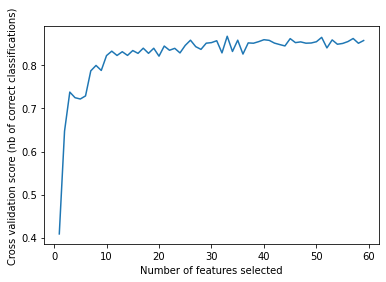

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
model = RandomForestClassifier()
rfecv = RFECV(estimator=model, cv=kf,scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
selected = rfecv.support_

In [ ]:
num = 0
todelete = []
for i in selected:
  if i ==False:
    todelete.append(num)
    num += 1

In [ ]:
X_train_selected = X_train.drop(X_train.columns[todelete], axis=1)

In [ ]:
X_test_selected = X_test.drop(X_test.columns[todelete], axis=1)

In [ ]:
kf = KFold(n_splits=9, random_state=None, shuffle=False)
params = {'n_estimators':[10, 100, 500], 'max_depth':[1, 2, 5]}
clf = RandomForestClassifier()
gs = GridSearchCV(clf, cv=kf, param_grid=params, return_train_score=True)

gs.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [ ]:
gs.cv_results_

{'mean_fit_time': array([ 0.08084848,  0.72950766,  3.63505348,  0.12434141,  1.20377639,
         5.91489175,  0.25051316,  2.43477538, 12.20890432]),
 'mean_score_time': array([0.00320249, 0.01590864, 0.07276519, 0.00331095, 0.01750734,
        0.0808061 , 0.00384275, 0.02070162, 0.09734223]),
 'mean_test_score': array([0.46459259, 0.47481481, 0.48385185, 0.61659259, 0.69933333,
        0.70637037, 0.74385185, 0.76355556, 0.7602963 ]),
 'mean_train_score': array([0.51139815, 0.48217593, 0.48201852, 0.79255556, 0.8395463 ,
        0.84887037, 0.95653704, 0.96783333, 0.96907407]),
 'param_max_depth': masked_array(data=[1, 1, 1, 2, 2, 2, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],


In [ ]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
gs.best_score_

0.7635555555555557

In [ ]:
#Training the model with the best parameters
bestclf = RandomForestClassifier(max_depth=5, n_estimators=100)
bestclf.fit(X_train_selected, y_train)
tr_p = bestclf.predict(X_train_selected)
print(accuracy_score(y_train, tr_p))
confusion_matrix(y_train, tr_p)

0.9631851851851851


array([[2777,    0,    7,    0,    0],
       [  17, 2503,    8,   17,   37],
       [  39,    0, 2609,    1,    0],
       [  33,    0,   37, 2364,   42],
       [  63,   84,   91,   21, 2750]])

In [ ]:
#Running the model on the test set
predictions = bestclf.predict(X_test_selected)
print(accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)

0.7638750651689653


array([[4239,   48,  179,    0,    0],
       [ 119, 3150,   11,   53, 1069],
       [1233,    0, 3480,    5,   61],
       [1008,    0,    1, 1977,  928],
       [  35,   87,   85,   60, 3271]])